<center>

# Esercizio 1

</center>

In [235]:
import numpy as np
import matplotlib.pyplot as plt

In [236]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [237]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [238]:
np.random.seed(0)   #impongo seed generatore numeri casuali

#Determino le x di allenamento e validazione
x_train = np.random.uniform(-1, 1, 500) #Ascisse Train
x_valid = np.random.uniform(-1, 1, 50)  #Ascisse Test
x_valid.sort()  #Ordino in modo crescente ascisse test

y_target = m * x_valid + b  #Distribuzione target

sigma = 2 #Stddev per rumore gaussiano
y_train = np.random.normal(m * x_train + b, sigma)  #Valori con rumore per allenamento
y_valid = np.random.normal(m * x_valid + b, sigma)  #Valori con rumore per testrint(x_valid)

In [239]:
#"Creo" la rete neurale
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#Riassunto del modello
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [240]:
#Alleno il modello
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

model.get_weights()

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 5.0803 - mse: 5.0803 - val_loss: 6.0989 - val_mse: 6.0989
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 4.7151 - mse: 4.7151 - val_loss: 5.6025 - val_mse: 5.6025
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 4.4946 - mse: 4.4946 - val_loss: 5.2635 - val_mse: 5.2635
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 4.3498 - mse: 4.3498 - val_loss: 5.0201 - val_mse: 5.0201
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 4.2432 - mse: 4.2432 - val_loss: 4.8633 - val_mse: 4.8633
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 4.1721 - mse: 4.1721 - val_loss: 4.7427 - val_mse: 4.7427
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 4.1177 - mse: 4.1177 - val_loss: 4.6664 - val_mse: 4.6664
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 4.0763 - mse: 4.0

In [241]:
x_pred = np.random.uniform(-1, 1, 100)
appo = model.predict(x_pred)
y_pred = np.array([i for i in appo])


4/4 [==============================] - 0s 2ms/step


In [242]:
#Stampo Loss Function
appo = history.history['loss']
pippo = history.history['val_loss']

file = open('loss.dat', 'w')

for i in range(0, len(appo)):
    file.write(str(appo[i]) + "  ")

file.write('\n')

for i in range(0, len(pippo)):
    file.write(str(pippo[i]) + "  ")

file.write('\n')
file.close()


#Stampo predizioni modello
file = open('pred.dat', 'w')

file.write('\n')

for i in range(0, len(x_pred)):
    file.write(str(x_pred[i]) + "  ")

file.write('\n')

for i in range(0, len(y_pred)):
    appo = str(y_pred[i])
    appo = appo.strip('[]')
    file.write(str(appo) + "    ")

file.write('\n')
file.close()


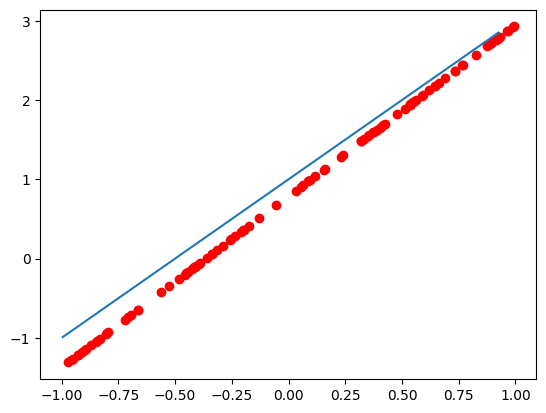

In [243]:
val = np.loadtxt("pred.dat")
plt.scatter(val[0, :], val[1, :], color = 'red')
plt.plot(x_valid, y_target)